# Loan preddiction 

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
warnings.filterwarnings('ignore')

# Colors
color = sns.color_palette('pastel')

In [2]:
df = pd.read_csv('data/train.csv')
df2 = pd.read_csv('data/test.csv')

In [17]:
#df.info()

In [12]:
# df2.info()

In [5]:
#df.describe()

In [ ]:
#df2.describe()

In [6]:
#df.shape

In [ ]:
# df2.shape

## Data Pre-processing

### Imputing missing values for df

In [7]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode(dropna=True)[0])
df['Married'] = df['Married'].fillna(df['Married'].mode(dropna=True)[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode(dropna=True)[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode(dropna=True)[0])

Let's analyze the numeric columns with missing values to know what imputacion tecnique use.

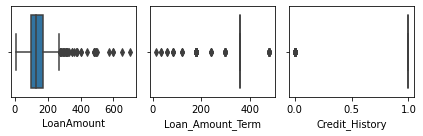

In [8]:
plt.figure(figsize = (6, 2))
plt.subplot(131)
sns.boxplot(df['LoanAmount'])
#.plot.box()
plt.subplot(132)
sns.boxplot(df['Loan_Amount_Term'])
plt.subplot(133)
sns.boxplot(df['Credit_History'])
plt.tight_layout()
plt.show()

In [9]:
df['LoanAmount'] = df['LoanAmount'].fillna(np.mean(df['LoanAmount']))
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode(dropna=True)[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode(dropna=True)[0])

### Imputing missing values for df2

In [10]:
df2['Gender'] = df2['Gender'].fillna(df2['Gender'].mode(dropna=True)[0])
df2['Dependents'] = df2['Dependents'].fillna(df2['Dependents'].mode(dropna=True)[0])
df2['Self_Employed'] = df2['Self_Employed'].fillna(df2['Self_Employed'].mode(dropna=True)[0])

In [11]:
df2['LoanAmount'] = df2['LoanAmount'].fillna(np.mean(df2['LoanAmount']))
df2['Loan_Amount_Term'] = df2['Loan_Amount_Term'].fillna(df2['Loan_Amount_Term'].mode(dropna=True)[0])
df2['Credit_History'] = df2['Credit_History'].fillna(df2['Credit_History'].mode(dropna=True)[0])

## Looking for relations

### Gender

In [24]:
# Let's encode the target feature.
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N':0})

In [26]:
df.groupby('Gender')['Loan_Status'].mean()

Gender
Female    0.669643
Male      0.691235
Name: Loan_Status, dtype: float64

Althought there are more number of men than women, the percentage of granted loans is almost the same.

### Married

In [28]:
df.groupby('Married')['Loan_Status'].mean()

Married
No     0.629108
Yes    0.718204
Name: Loan_Status, dtype: float64

acording to the result, married person has more chance of obtaining a loan.

### Education

In [29]:
df.groupby('Education')['Loan_Status'].mean()

Education
Graduate        0.708333
Not Graduate    0.611940
Name: Loan_Status, dtype: float64

A graduate person has more opportunity to obtain a loan.

### Self Employed

In [35]:
df.groupby(['Self_Employed'])['Loan_Status'].mean()

Self_Employed
No     0.687970
Yes    0.682927
Name: Loan_Status, dtype: float64

The result for this feature don't say too much. Let's see if the combination of education and self employed give a better view. 

### Education - Self Employed

In [36]:
df.groupby(['Education', 'Self_Employed'])['Loan_Status'].mean()

Education     Self_Employed
Graduate      No               0.708434
              Yes              0.707692
Not Graduate  No               0.615385
              Yes              0.588235
Name: Loan_Status, dtype: float64

Here we have a better view, if somebody is graduated doesn't matter whether is self employed or not, the probability to obtain a loan is a little more than 70%. Unlike to somebody who is not graduated, if they are self employed have less chance to get a loan than if they aren't(yes, weird but true).

### Property Area

In [37]:
df.groupby('Property_Area')['Loan_Status'].mean()

Property_Area
Rural        0.614525
Semiurban    0.768240
Urban        0.658416
Name: Loan_Status, dtype: float64

As we can see, people that have properties in a semiurban area have more chance to obtain a loan, unlike that people with properties in a rural area, they have the less chance.

### Dependents

In [38]:
df.groupby('Dependents')['Loan_Status'].mean()

Dependents
0     0.686111
1     0.647059
2     0.752475
3+    0.647059
Name: Loan_Status, dtype: float64

Have 2 dependents give you a better opportunity to get a loan.

## Dividing predictor features and target feature

In [13]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]